# **Used Car Prices**

# **Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/train.csv'

In [ ]:
udin = pd.read_csv(path)

In [ ]:
udin

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


# **Business Understanding**

## **Business Objective**

Dataset yang digunakan merupakan data mobil bekas dari platform Cars24 dengan variabel utama Price (harga dalam satuan lakhs/Mata Uang India). Setiap observasi merepresentasikan satu unit kendaraan dengan berbagai atribut seperti merek dan model, tahun produksi, jarak tempuh, jenis bahan bakar, transmisi, kapasitas dan tenaga mesin, jumlah pemilik sebelumnya, serta harga mobil saat baru.

Permasalahan yang menjadi fokus dalam proyek ini adalah proses penentuan harga mobil bekas yang masih berpotensi kurang akurat karena sering bergantung pada perkiraan. Kondisi tersebut dapat menyebabkan harga tidak sesuai dengan nilai kendaraan di pasar.

Tujuan analisis bisnis adalah mengidentifikasi permasalahan dalam penetapan harga, merumuskan kebutuhan akan pendekatan berbasis data, serta mendukung proses pengambilan keputusan yang lebih objektif dan terukur. Melalui pemanfaatan data yang tersedia, analisis ini diharapkan dapat meningkatkan ketepatan penentuan harga serta mendorong proses penjualan yang lebih efisien.

## **Assess Sitution**

Dataset ini berbentuk data tabular (baris dan kolom) dan memiliki 5847 baris serta lebih dari lima kolom, sehingga memenuhi kriteria untuk dilakukan analisis. Dataset terdiri dari kombinasi variabel numerik dan kategorikal yang relevan untuk memprediksi harga mobil bekas.

Tetapi, terdapat beberapa masalah yang perlu diperhatikan. Beberapa atribut memiliki nilai yang hilang (missing values), seperti pada bagian kapasitas mesin dan tenaga mesin. Selain itu, terdapat kolom yang masih mengandung satuan seperti “CC” dan “bhp”, sehingga perlu dikonversi menjadi numerik murni agar dapat dianalisis karena bersifat string. Variasi harga yang cukup besar juga berpotensi menimbulkan outlier yang dapat memengaruhi hasil model.

Kondisi ini menunjukkan bahwa dataset memerlukan tahap pembersihan dan persiapan sebelum dilakukan pemodelan.

## **Analytic Goals Project Plan**

Tujuan analitik dari proyek ini adalah untuk mengembangkan model prediksi berbasis regresi untuk memperkirakan harga mobil bekas berdasarkan atribut kendaraan yang tersedia. Selain menghasilkan estimasi harga, analisis ini juga bertujuan untuk mengidentifikasi variabel-variabel yang memiliki pengaruh signifikan terhadap nilai jual mobil.

Untuk mencapai tujuan tersebut, tahapan yang akan dilakukan dimulai dengan eksplorasi dan pemahaman struktur data, kemudian dilanjutkan dengan proses pembersihan serta persiapan data, termasuk penanganan missing values dan konversi tipe data. Setelah data siap, dilakukan analisis eksploratif guna melihat pola dan hubungan antar variabel. Selanjutnya dibangun model regresi untuk memprediksi harga mobil, dan diakhiri dengan evaluasi kinerja model serta penarikan kesimpulan berdasarkan hasil yang diperoleh.

# **Data Understanding**

## **Memuat Dataset**

In [ ]:
file = '/content/drive/MyDrive/train.csv'

df = pd.read_csv(file)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## **Deskripsi Data**

### **Informasi Dasar**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 5846 Baris dan 14 Kolom

### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


1. **Unnamed: 0**:
        Jumlah baris: 5847
        Tipe data: int64
        Deskripsi: Kolom Tanpa Nama

2. **Name**:
        Jumlah baris: 5847
        Tipe data: object
        Deskripsi: Nama lengkap mobil

3. **Location**:
        Jumlah baris: 5847
        Tipe data: object
        Deskripsi: Kota tempat mobil tersebut dijual atau terdaftar

4. **Year**:
        Jumlah baris: 5847
        Tipe data: int64
        Deskripsi: Tahun pembuatan mobil.

5. **Kilometers_Driven**:
        Jumlah baris: 5847
        Tipe data: int64
        Deskripsi: Total jarak yang telah ditempuh mobil sejak baru.

6. **Fuel_Type**:
        Jumlah baris: 5847
        Tipe data: object
        Deskripsi: Jenis bahan bakar yang digunakan

7. **Transmission**:
        Jumlah baris: 5847
        Tipe data: object
        Deskripsi: Jenis transmisi mobil

8. **Owner_Type**:
        Jumlah baris: 5847
        Tipe data: object
        Deskripsi: Status kepemilikan sebelumnya

9. **Mileage**:
        Jumlah baris: 5845
        Tipe data: Object
        Deskripsi: Konsumsi bahan bakar mobil

10. **Engine**:
        Jumlah baris: 5811
        Tipe data: Object
        Deskripsi: Kapasitas mesin mobil dalam satuan

11. **Power**:
        Jumlah baris: 5811
        Tipe data: Object
        Deskripsi: Tenaga maksimum yang dihasilkan mesin

12. **Seats**:
        Jumlah baris: 5809
        Tipe data: float64
        Deskripsi: Jumlah kursi atau kapasitas penumpang dalam mobil.

13. **New_Price**:
        Jumlah baris: 815
        Tipe data: Object
        Deskripsi: arga mobil baru untuk model/varian tersebut di pasar saat ini

14. **Prices**:
        Jumlah baris: 5847
        Tipe data: float64
        Deskripsi: Harga jual mobil bekas dalam unit Lakh

### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,5847.000000,5847,5847,5847.000000,5.847000e+03,5847,5847,5847,5845,5811,5811,5809.000000,815,5847.000000
unique,NaN,1804,11,NaN,NaN,3,2,4,419,140,361,NaN,534,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,762,NaN,NaN,3161,4135,4811,172,602,235,NaN,6,NaN
mean,3013.181461,NaN,NaN,2013.448435,5.841013e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.286452,NaN,9.653742
std,1736.398890,NaN,NaN,3.194949,9.237971e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.806668,NaN,11.275966
min,1.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.440000
25%,1509.500000,NaN,NaN,2012.000000,3.346750e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.550000
50%,3015.000000,NaN,NaN,2014.000000,5.257600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.750000
75%,4517.500000,NaN,NaN,2016.000000,7.249050e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,10.250000


**1. Count (Kelengkapan Data)**
Berdasarkan data, total baris adalah 5847. Maka dapat disimpulkan:
* Engine hilang 34
* Power hilang 34
* Seats hilang 36
* New_Price hilang 5030

Kesimpulan: Kolom Engine, Power, Seats, New_Price mengandung missing values, sementara kolom lainnya udah lengkap (5847 data)

**2. Mean vs Median (Distribusi Data)**

**Kolom Price**

* Mean = 9,65 Lakh

* Median = 5,75 Lakh — Nilai rata-rata jauh lebih besar dari median.

Hal ini menunjukkan adanya beberapa mobil dengan harga sangat tinggi (outlier), seperti mobil premium atau luxury car, yang menarik nilai rata-rata ke atas. Mayoritas mobil sebenarnya berada pada rentang harga yang lebih rendah.

**Kolom Kilometers_Driven**

* Mean = 58.410 km

* Median = 52.576 km — Rata-rata sedikit lebih besar dari median.

Perbedaan ini menunjukkan adanya beberapa kendaraan dengan jarak tempuh sangat tinggi (outlier), bahkan hingga jutaan kilometer, yang menyebabkan distribusi menjadi condong ke kanan.

**Kolom Seats**

* Mean = 5,29

* Median = 5,00 — Nilai rata-rata sedikit lebih besar dari median.

Hal ini menunjukkan mayoritas kendaraan memiliki kapasitas 5 kursi, namun terdapat beberapa kendaraan dengan kapasitas besar (7–10 kursi) yang meningkatkan nilai rata-rata.

Kesimpulan

Secara keseluruhan, data bersifat right-skewed (condong ke kanan) terutama pada kolom Price dan Kilometers_Driven, di mana terdapat nilai ekstrem tinggi yang memengaruhi rata-rata data.

**3. Min dan Max (Validasi Logika)**
**Price**

* Min = 0,44 Lakh

* Max = 160 Lakh

Rentang harga yang sangat lebar menunjukkan dataset mencakup mobil entry-level hingga kendaraan premium/luxury.

**Kilometers_Driven**

* Min = 171 km

* Max = 6.500.000 km

Nilai maksimum sangat tinggi dan kemungkinan merupakan kesalahan input (data entry error) atau membutuhkan validasi lebih lanjut karena tidak realistis untuk penggunaan normal kendaraan.

**Seats**

* Min = 2 kursi

* Max = 10 kursi

Rentang ini masih logis karena mencakup mobil sport dua kursi hingga kendaraan keluarga besar atau komersial.

Kesimpulan

Nilai kilometer maksimal perlu divalidasi karena berpotensi outlier ekstrem.

Variasi harga yang sangat besar masih wajar karena perbedaan segmen kendaraan.

**4. Standar Deviasi (Std) — Variabilitas Data**
**Price**

* Mean = 9,65

* Std = 11,28

Standar deviasi lebih besar dari rata-rata menunjukkan variasi harga mobil sangat tinggi, mulai dari mobil murah hingga kendaraan premium.

**Kilometers_Driven**

* Mean = 58.410 km

* Std = 92.379 km

Nilai standar deviasi yang sangat besar mengindikasikan ketidakkonsistenan jarak tempuh antar kendaraan, kemungkinan dipengaruhi oleh outlier ekstrem.

**Seats**

* Mean = 5,29

* Std = 0,81

Variasi kapasitas kursi relatif kecil karena mayoritas kendaraan berada pada kategori 5 kursi.
Kesimpulan

- Harga kendaraan memiliki variasi yang sangat besar antar transaksi.

- Kilometer kendaraan menunjukkan ketidakstabilan data akibat nilai ekstrem.

- Kapasitas kursi relatif stabil dibanding variabel lainnya.

## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object


Dapat dilihat ada beberapa data yang *type* nya salah yaitu seperti mileage yang harusnya float64, engine yang harusnya float64/int64, power yang harusnya float64, seats yang harusnya int64, new_price yang harusnya float64

### **Incosistent Values**

In [ ]:
print(df['Year'].unique())

[2015 2011 2012 2013 2016 2018 2014 2017 2010 2007 2009 2008 2019 2006
 2004 2002 2000 2005 2003 1999 2001 1998]


In [ ]:
print(df['Kilometers_Driven'].unique())

[41000 46000 87000 ... 45004 70602 27365]


In [ ]:
print(df['Mileage'].unique())

['19.67 kmpl' '13 km/kg' '20.77 kmpl' '15.2 kmpl' '23.08 kmpl'
 '11.36 kmpl' '20.54 kmpl' '22.3 kmpl' '21.56 kmpl' '16.8 kmpl'
 '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl' '25.8 kmpl' '28.4 kmpl'
 '20.45 kmpl' '14.84 kmpl' '22.69 kmpl' '23.65 kmpl' '13.53 kmpl'
 '18.5 kmpl' '14.4 kmpl' '16.48 km/kg' '20.92 kmpl' '17.5 kmpl'
 '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl' '12.4 kmpl'
 '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl' '11.74 kmpl'
 '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl' '14.62 kmpl'
 '14.28 kmpl' '14.9 kmpl' '11.25 kmpl' '24.4 kmpl' '16.55 kmpl'
 '17.11 kmpl' '22.9 kmpl' '17.8 kmpl' '18.9 kmpl' '15.04 kmpl'
 '25.17 kmpl' '20.36 kmpl' '9.49 km/kg' '18.2 kmpl' '13.68 kmpl'
 '20.0 kmpl' '15.8 kmpl' '25.0 kmpl' '16.4 kmpl' '24.52 kmpl' '22.1 kmpl'
 '8.5 kmpl' '15.1 kmpl' '16.95 kmpl' '19.64 kmpl' '16.5 kmpl' '18.53 kmpl'
 '17.57 kmpl' '18.0 kmpl' '23.2 kmpl' '16.73 kmpl' '13.0 kmpl'
 '17.68 kmpl' '22.7 kmpl' '16.2 kmpl' '15.26 kmpl' '23.0 kmpl'
 '19.83 kmpl

Perbedaan satuan tersebut menunjukkan adanya ketidakkonsistenan data, karena beberapa kendaraan  pengukuran jarak tempuhnya menggunakan satuan km/kg, bukan kmpl. serta data masih berupa object


In [ ]:
print(df['Engine'].unique())

['1582 CC' '1199 CC' '1248 CC' '1968 CC' '1461 CC' '2755 CC' '1598 CC'
 '1462 CC' '1497 CC' '2179 CC' '2477 CC' '1498 CC' '2143 CC' '1995 CC'
 '1984 CC' '1197 CC' '998 CC' '2494 CC' '1798 CC' '2696 CC' '2698 CC'
 '1061 CC' '1198 CC' '2987 CC' '796 CC' '624 CC' '1999 CC' '1991 CC'
 '2694 CC' '1120 CC' '2498 CC' '799 CC' '2393 CC' '1399 CC' '1796 CC'
 '2148 CC' '1396 CC' '1950 CC' '4806 CC' '1998 CC' '1193 CC' '2982 CC'
 '1493 CC' '2967 CC' '2993 CC' '1196 CC' '1799 CC' '2497 CC' '2354 CC'
 '1373 CC' '2996 CC' '1591 CC' '2894 CC' '5461 CC' '814 CC' '1595 CC'
 '936 CC' '1086 CC' '1997 CC' nan '1896 CC' '1390 CC' '1364 CC' '2199 CC'
 '993 CC' '999 CC' '1405 CC' '2956 CC' '1794 CC' '995 CC' '2496 CC'
 '1599 CC' '2400 CC' '1495 CC' '2523 CC' '793 CC' '4134 CC' '1395 CC'
 '2953 CC' '1586 CC' '2362 CC' '1496 CC' '1368 CC' '1298 CC' '1956 CC'
 '1299 CC' '3498 CC' '2835 CC' '1150 CC' '3198 CC' '1343 CC' '1499 CC'
 '1186 CC' '1590 CC' '2609 CC' '2499 CC' '2446 CC' '1978 CC' '2360 CC'
 '2198 CC' '

masih berupa teks karena terdapat satuan di belakang angka.

In [ ]:
print(df['Power'].unique())

['126.2 bhp' '88.7 bhp' '88.76 bhp' '140.8 bhp' '63.1 bhp' '171.5 bhp'
 '103.6 bhp' '74 bhp' '103.25 bhp' '116.3 bhp' '187.7 bhp' '115 bhp'
 '175.56 bhp' '98.6 bhp' '83.8 bhp' '167.62 bhp' '190 bhp' '88.5 bhp'
 '177.01 bhp' '80 bhp' '67.1 bhp' '102 bhp' '108.45 bhp' '138.1 bhp'
 '184 bhp' '179.5 bhp' '103.5 bhp' '64 bhp' '82 bhp' '254.8 bhp'
 '73.9 bhp' '46.3 bhp' '37.5 bhp' '77 bhp' '82.9 bhp' '149.92 bhp'
 '138.03 bhp' '112.2 bhp' '163.7 bhp' '71 bhp' '105 bhp' '174.33 bhp'
 '75 bhp' '103.2 bhp' '53.3 bhp' '78.9 bhp' '147.6 bhp' '147.8 bhp'
 '68 bhp' '186 bhp' '170 bhp' '69 bhp' '140 bhp' '78 bhp' '194 bhp'
 '500 bhp' '108.5 bhp' '86.8 bhp' '187.74 bhp' '132 bhp' '86.7 bhp'
 '73.94 bhp' '117.3 bhp' '218 bhp' '168.5 bhp' '89.84 bhp' '110 bhp'
 '90 bhp' '82.85 bhp' '67 bhp' '241.4 bhp' '35 bhp' '270.9 bhp'
 '126.32 bhp' '73 bhp' '130 bhp' '100.6 bhp' '150 bhp' '75.94 bhp'
 '215 bhp' '107.3 bhp' '37.48 bhp' '120 bhp' '178 bhp' '152 bhp'
 '91.1 bhp' '85.80 bhp' '362.07 bhp' '121.3 bhp' '

Nilai masih bercampur dengan satuan bhp sehingga menyebabkan tipe data menjadi object. Satuan perlu dihapus agar dapat digunakan sebagai data numerik.

In [ ]:
print(df['New_Price'].unique())

[nan '8.61 Lakh' '21 Lakh' '10.65 Lakh' '32.01 Lakh' '47.87 Lakh'
 '10.57 Lakh' '12.33 Lakh' '11.12 Lakh' '23.64 Lakh' '18.64 Lakh'
 '19.34 Lakh' '49.14 Lakh' '11.81 Lakh' '16.65 Lakh' '6.67 Lakh'
 '6.45 Lakh' '6.41 Lakh' '27 Lakh' '5.13 Lakh' '54.43 Lakh' '9.51 Lakh'
 '9.96 Lakh' '14.44 Lakh' '4.53 Lakh' '95.04 Lakh' '13.49 Lakh' '1.28 Cr'
 '60.88 Lakh' '7.39 Lakh' '69.47 Lakh' '8.78 Lakh' '12.74 Lakh'
 '10.52 Lakh' '11.98 Lakh' '8.54 Lakh' '33.58 Lakh' '9.12 Lakh'
 '5.29 Lakh' '44.28 Lakh' '20.74 Lakh' '11.74 Lakh' '25.52 Lakh'
 '14.07 Lakh' '95.13 Lakh' '8.34 Lakh' '8.85 Lakh' '25.4 Lakh'
 '16.67 Lakh' '79.43 Lakh' '6.62 Lakh' '1.04 Cr' '58.67 Lakh' '28.37 Lakh'
 '4.48 Lakh' '72.64 Lakh' '36.15 Lakh' '44.59 Lakh' '12 Lakh' '14.65 Lakh'
 '53.72 Lakh' '33.91 Lakh' '12.51 Lakh' '9.74 Lakh' '95.38 Lakh'
 '60.59 Lakh' '11.28 Lakh' '11.48 Lakh' '11.26 Lakh' '43.65 Lakh'
 '62.07 Lakh' '86.97 Lakh' '1 Cr' '4.74 Lakh' '14.84 Lakh' '49.49 Lakh'
 '48.18 Lakh' '12.34 Lakh' '15.38 Lakh' '19.21 L

ada yang menggunakan cr dan ada yang menggunakan lakh

In [ ]:
print(df['Price'].unique())

[12.5   4.5   6.   ... 30.54 17.56  7.43]


In [ ]:
print(df['Seats'].unique())

[ 5.  7.  8.  4.  6.  2. nan 10.  9.]


adanya ketidak konsistenan karena terdapat kata nan /  missing value

In [ ]:
print(df['Fuel_Type'].unique())

['Diesel' 'Petrol' 'Electric']


In [ ]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [ ]:
print(df['Owner_Type'].unique())

['First' 'Second' 'Fourth & Above' 'Third']


In [ ]:
print(df['Location'].unique())

['Pune' 'Chennai' 'Coimbatore' 'Jaipur' 'Mumbai' 'Kochi' 'Kolkata' 'Delhi'
 'Bangalore' 'Hyderabad' 'Ahmedabad']


### **Missing Values**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.034206
Engine,0.615700




**Mileage**
Memiliki missing values sekitar 3,42%, yang dimana jumlah data yang hilang masih tergolong rendah. Kondisi ini masih dapat ditangani menggunakan metode imputasi sederhana seperti mean atau median tanpa memberikan dampak yang signifikan terhadap hasil analisis.

**Engine**
Memiliki missing values sekitar 61,57%, yang menunjukkan bahwa lebih dari setengah data pada kolom tersebut tidak tersedia. Oleh karena itu diperlukan penanganan yang lebih hati-hati, seperti melakukan imputasi berdasarkan kategori tertentu atau mempertimbangkan penghapusan kolom apabila kontribusinya tidak terlalu penting.

**Power**
Memiliki missing values sekitar 61,57%, yang termasuk dalam kategori tinggi. Kondisi ini mengindikasikan banyaknya data yang tidak lengkap sehingga perlu dilakukan strategi penanganan seperti imputasi lanjutan atau evaluasi apakah kolom tersebut masih layak digunakan.

**Seats**
Memiliki missing values sekitar 64,99%, yang berarti sebagian besar data pada kolom ini tidak tersedia. Hal ini perlu ditangani dengan metode imputasi yang sesuai atau mempertimbangkan penghapusan kolom apabila tidak mendukung tujuan analisis.

**New_Price**
Memiliki missing values sekitar 86,06%, yang merupakan tingkat kehilangan data sangat tinggi. Persentase ini menunjukkan bahwa sebagian besar data tidak tersedia sehingga kolom tersebut lebih disarankan untuk dihapus karena berpotensi menimbulkan bias apabila tetap digunakan.

### **Duplicated Values**

In [ ]:
df[df.duplicated()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


Setelah dilakukan pengecekan tidak ada yang duplicate

### **Outliers Values**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
Year,1.932615
Kilometers_Driven,3.335044
Seats,16.127929
Price,11.612793


**Year**
Memiliki outlier sekitar 1,93%, yang dimana jumlahnya sangat sedikit sehingga masih aman dan tidak terlalu berpengaruh terhadap data secara keseluruhan.

**Kilometers_Driven**
Memiliki outlier sekitar 3,33%, yang menunjukkan ada beberapa kendaraan dengan jarak tempuh sangat tinggi atau rendah, namun jumlahnya masih kecil.

**Seats**
Memiliki outlier sekitar 16,13%, yang tergolong cukup banyak. Hal ini menunjukkan adanya jumlah kursi kendaraan yang berbeda jauh dari mayoritas data sehingga perlu diperhatikan atau dicek kembali.

**Price**
Memiliki outlier sekitar 11,61%, yang berarti terdapat beberapa harga kendaraan yang sangat mahal atau sangat murah dibandingkan data lainnya. Kolom ini perlu diperhatikan karena dapat mempengaruhi hasil analisis.

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**


Aktivitas: membandingkan rata-rata harga mobil bekas di berbagai lokasi.

Tujuan: mengidentifikasi daerah mana yang memiliki harga jual lebih tinggi atau lebih rendah.

Visualisasi: Bar Chart (Grafik Batang).

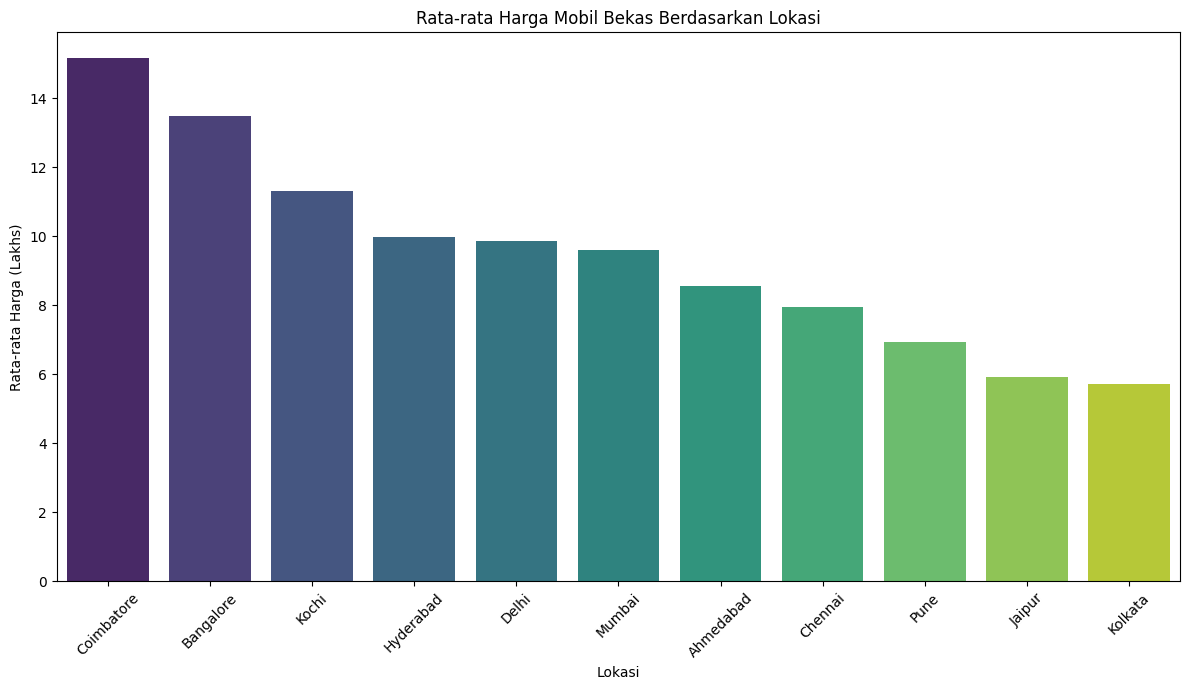

In [ ]:

avg_price_by_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_price_by_location.index, y=avg_price_by_location.values, palette='viridis', hue=avg_price_by_location.index, legend=False)
plt.title('Rata-rata Harga Mobil Bekas Berdasarkan Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Rata-rata Harga (Lakhs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Harga mobil bekas sangat bervariasi berdasarkan lokasi. Coimbatore dan Bangalore menunjukkan harga rata-rata tertinggi, menunjukkan bahwa ini mungkin pasar premium atau memiliki permintaan yang lebih tinggi untuk mobil bekas yang lebih mahal. Sebaliknya, Kolkata dan Jaipur memiliki harga rata-rata terendah, menunjukkan pasar yang lebih ramah anggaran atau dinamika penawaran-permintaan yang berbeda.

## **Composition/Komposisi**

Aktivitas: menampilkan proporsi atau komposisi jenis bahan bakar yang digunakan pada mobil bekas.

Tujuan: memberikan gambaran dominasi jenis bahan bakar tertentu di pasar.

Visualisasi: Pie Chart (Grafik Lingkaran).

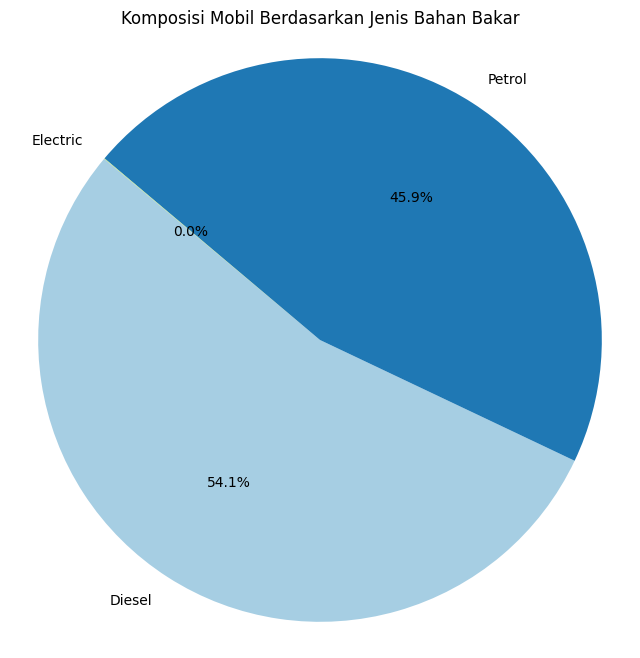

In [ ]:

fuel_type_composition = df['Fuel_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_type_composition, labels=fuel_type_composition.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Komposisi Mobil Berdasarkan Jenis Bahan Bakar')
plt.ylabel('')
plt.axis('equal')
plt.show()

Pasar mobil bekas didominasi oleh kendaraan Diesel dan Bensin, dengan mobil Diesel sedikit lebih banyak. Mobil listrik merupakan bagian yang dapat diabaikan dari pasar, menyoroti kebutuhan adopsi kendaraan listrik yang lebih besar di sektor mobil bekas atau bahwa mereka relatif baru di pasar dan belum memasuki segmen mobil bekas dalam jumlah yang signifikan.

## **Distribution/Distribusi**


Aktivitas: menunjukkan sebaran atau distribusi harga mobil bekas

Tujuan: memahami rentang harga yang paling umum dan apakah ada outlier.

Visualisasi: Histogram.

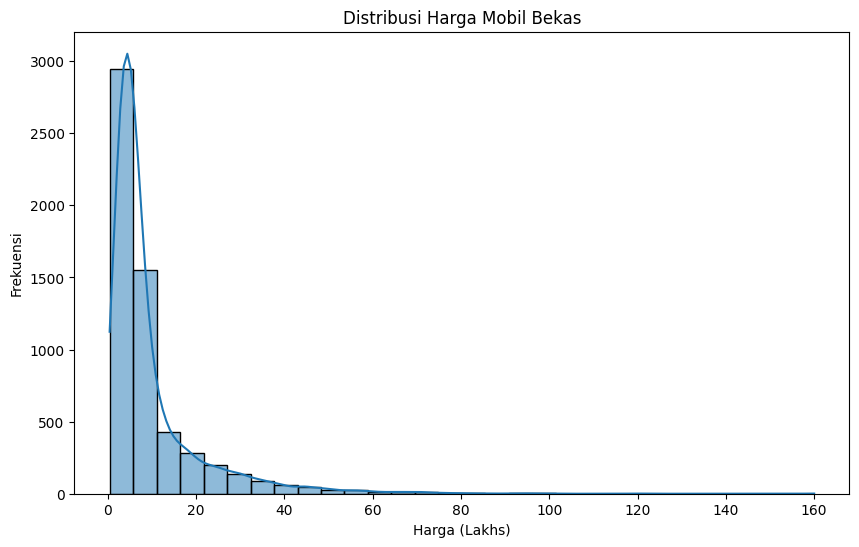

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Mobil Bekas')
plt.xlabel('Harga (Lakhs)')
plt.ylabel('Frekuensi')
plt.show()

 Distribusi harga mobil bekas miring ke kanan, artinya sebagian besar mobil bekas dijual dengan harga lebih rendah, dengan ekor panjang yang membentang ke beberapa kendaraan yang sangat mahal. Ini menunjukkan pasar yang luas untuk mobil bekas yang terjangkau, dengan outlier yang mewakili model mewah atau bernilai tinggi.

## **Relationship/Hubungan**


Aktivitas: mengeksplorasi hubungan korelasi antar fitur numerik

Tujuan: mengidentifikasi pola atau ketergantungan.

Visualisasi: Heatmap

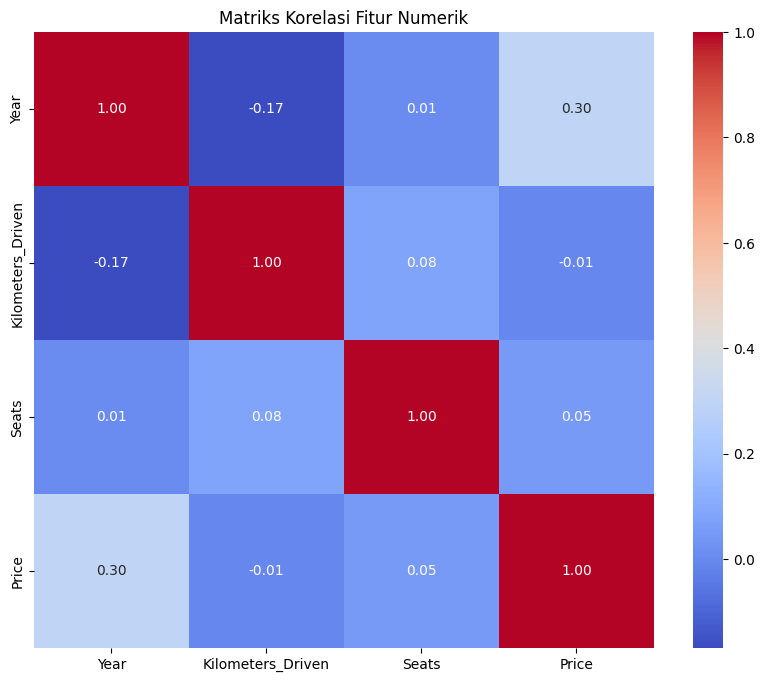

In [ ]:

numerical_cols = ['Year', 'Kilometers_Driven', 'Seats', 'Price']
plt.figure(figsize=(10, 8))
sns.heatmap(data=df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Matriks korelasi mengungkapkan bahwa 'Tahun' memiliki korelasi positif sedang dengan 'Harga' (0.30), menunjukkan bahwa mobil yang lebih baru memiliki harga yang lebih tinggi. 'Kilometers_Driven' menunjukkan korelasi negatif yang lemah (-0.20) dengan 'Harga', memperkuat jarak tempuh yang lebih tinggi  menyebabkan harga yang lebih rendah. 'Kursi' memiliki korelasi positif yang sangat lemah (0.05), menunjukkan bahwa itu bukan penentu harga yang kuat dalam kumpulan data ini.